In [131]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

from PIL import Image, ImageDraw

In [146]:
cc = np.array([[1000 == np.round((x - 50)**2 + (y - 50)**2) for y in range(0, 101)] for x in range(0, 101)]).astype(np.uint8)

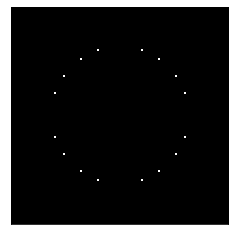

In [147]:
plt.imshow(cc, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [155]:
t = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, np.ceil(100*np.sqrt(2)), 100)

In [156]:
t

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [157]:
r

array([  0.        ,   1.43434343,   2.86868687,   4.3030303 ,
         5.73737374,   7.17171717,   8.60606061,  10.04040404,
        11.47474747,  12.90909091,  14.34343434,  15.77777778,
        17.21212121,  18.64646465,  20.08080808,  21.51515152,
        22.94949495,  24.38383838,  25.81818182,  27.25252525,
        28.68686869,  30.12121212,  31.55555556,  32.98989899,
        34.42424242,  35.85858586,  37.29292929,  38.72727273,
        40.16161616,  41.5959596 ,  43.03030303,  44.46464646,
        45.8989899 ,  47.33333333,  48.76767677,  50.2020202 ,
        51.63636364,  53.07070707,  54.50505051,  55.93939394,
        57.37373737,  58.80808081,  60.24242424,  61.67676768,
        63.11111111,  64.54545455,  65.97979798,  67.41414141,
        68.84848485,  70.28282828,  71.71717172,  73.15151515,
        74.58585859,  76.02020202,  77.45454545,  78.88888889,
        80.32323232,  81.75757576,  83.19191919,  84.62626263,
        86.06060606,  87.49494949,  88.92929293,  90.36

In [158]:
def afunc(x, r, t):
    return x - np.atleast_2d(r).T @ np.atleast_2d(np.cos(t))

def bfunc(y, r, t):
    return y - np.atleast_2d(r).T @ np.atleast_2d(np.sin(t))

ab = np.zeros([250,250])

In [159]:
xx, yy = np.mgrid[:100,:100]

In [160]:
x = 10
np.max(afunc(x, r, t) + np.abs(np.min(afunc(x,r,t))))

283.9285090184123

In [161]:
y = 20

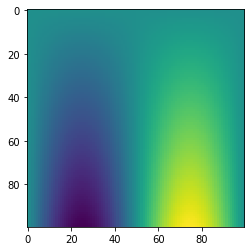

In [162]:
plt.imshow(bfunc(y, r, t))

In [163]:
afunc(x, r, t)

array([[  10.        ,   10.        ,   10.        , ...,   10.        ,
          10.        ,   10.        ],
       [   8.56565657,    8.56854436,    8.57719613, ...,    8.57719613,
           8.56854436,    8.56565657],
       [   7.13131313,    7.13708873,    7.15439225, ...,    7.15439225,
           7.13708873,    7.13131313],
       ...,
       [-129.13131313, -128.85119679, -128.01197568, ..., -128.01197568,
        -128.85119679, -129.13131313],
       [-130.56565657, -130.28265242, -129.43477955, ..., -129.43477955,
        -130.28265242, -130.56565657],
       [-132.        , -131.71410806, -130.85758342, ..., -130.85758342,
        -131.71410806, -132.        ]])

In [164]:
bfunc(y,r,t)

array([[20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 20.        ],
       [20.        , 19.90902832, 19.81842295, ..., 20.18157705,
        20.09097168, 20.        ],
       [20.        , 19.81805663, 19.63684589, ..., 20.36315411,
        20.18194337, 20.        ],
       ...,
       [20.        , 11.17574677,  2.3870257 , ..., 37.6129743 ,
        28.82425323, 20.        ],
       [20.        , 11.08477509,  2.20544865, ..., 37.79455135,
        28.91522491, 20.        ],
       [20.        , 10.99380341,  2.02387159, ..., 37.97612841,
        29.00619659, 20.        ]])

In [165]:
r

array([  0.        ,   1.43434343,   2.86868687,   4.3030303 ,
         5.73737374,   7.17171717,   8.60606061,  10.04040404,
        11.47474747,  12.90909091,  14.34343434,  15.77777778,
        17.21212121,  18.64646465,  20.08080808,  21.51515152,
        22.94949495,  24.38383838,  25.81818182,  27.25252525,
        28.68686869,  30.12121212,  31.55555556,  32.98989899,
        34.42424242,  35.85858586,  37.29292929,  38.72727273,
        40.16161616,  41.5959596 ,  43.03030303,  44.46464646,
        45.8989899 ,  47.33333333,  48.76767677,  50.2020202 ,
        51.63636364,  53.07070707,  54.50505051,  55.93939394,
        57.37373737,  58.80808081,  60.24242424,  61.67676768,
        63.11111111,  64.54545455,  65.97979798,  67.41414141,
        68.84848485,  70.28282828,  71.71717172,  73.15151515,
        74.58585859,  76.02020202,  77.45454545,  78.88888889,
        80.32323232,  81.75757576,  83.19191919,  84.62626263,
        86.06060606,  87.49494949,  88.92929293,  90.36

In [351]:
steps = 51
points = []

In [352]:
for rr in range(20, 51):
    for t in range(steps):
        points.append((rr, int(rr * np.cos(2 * np.pi * t / steps)), int(rr * np.sin(2 * np.pi * t / steps))))

In [353]:
xyr = np.zeros([101,101,101])

In [354]:
pts = np.array(points)

In [355]:
acc = defaultdict(int)

In [356]:
for cx in np.arange(101):
    for cy in np.arange(101):
        if cc[cx, cy] > 0:    
            for r, x, y in points:
                if ((x + cx) > 99) or ((x + cx) < 0): continue
                if ((y + cy) > 99) or ((y + cy) < 0): continue
                xyr[x + cx, y + cy, r] += 1
                acc[(x + cx, y + cy, r)] += 1

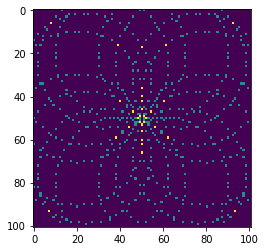

In [357]:
plt.imshow(xyr[:, :, 31])

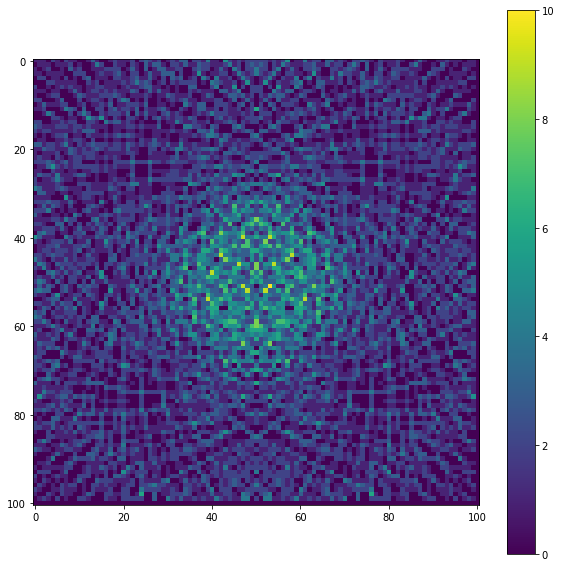

In [358]:
fig = plt.figure(figsize=(10,10))
plt.imshow(xyr.sum(axis=2))
plt.colorbar()

In [359]:
threshold = 0.04

In [361]:
circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
#     print(k, v)
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

0.0784313725490196 50 51 33


In [362]:
input_image = Image.fromarray(np.uint8(cc*255))

In [363]:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

In [364]:
for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

In [365]:
output_image.save("../images/test_51.png")